<a href="https://colab.research.google.com/github/AMMLRepos/ipl-data-set-analysis/blob/main/IPL_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('ipl-dataset-analysis')
jovian.set_colab_id('1Q7zvmORfgxTMMGfh1t5JUoKN-VwkUyx4')

# Project Title - Analyzing IPL (Indian Premier League) dataset available on [Kaggle](https://www.kaggle.com/harsha547/indian-premier-league-csv-dataset/code)

- This project analyzes IPL dataset which is openly and freely available on [kaggle](https://www.kaggle.com/harsha547/indian-premier-league-csv-dataset/code)
- [kaggle](https://www.kaggle.com/harsha547/indian-premier-league-csv-dataset/code) has thousands of freely available datasets for datanalaytics purpose
- Dataset has information on matches playes across the IPL seasons which can be used to answer some interesting questions related to teams' performance and many other interesting statistcs. 
- We will use Kaggle, python libraries like pandas, matplotlib and seaborn as major libraries 
- Google Colab (Jupyter notebook) as runtime environment 

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

- Below are the instructions to download the datasets available on [Kaggle](https://www.kaggle.com/)
- We will install [opendatasets](https://github.com/JovianML/opendatasets#opendatasets), a special library to donwload datasets from online sources like Kaggle and Google Drive
- Below is the command python code to download dataset of interest 

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Downloading IPL Dataset available on https://www.kaggle.com/harsha547/indian-premier-league-csv-dataset
dataset_url = 'https://www.kaggle.com/harsha547/indian-premier-league-csv-dataset' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./indian-premier-league-csv-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.

In [ ]:
# Set your directory to the folder which has files download from kaggle 
data_dir = './indian-premier-league-csv-dataset'

In [ ]:
import os
# List all the csv files available in the downloaded dataset 
os.listdir(data_dir)

['Team.csv',
 'Player.csv',
 'Player_Match.csv',
 'Season.csv',
 'Match.csv',
 'Ball_by_Ball.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "ipl-dataset-analysis" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

## Data Preparation and Cleaning

This section is the first and most important step, i.e. to clean and prepare data for consumption. Data Preparation and cleaning consumes the most amount of time for Data Engineers and Analysts.

### Why do we need to prepare and clean data ?
- To ensure that datasets has no missing values 
- Remove columns which does not make any sense in analysis process 
- Remove columns and data which could be a sensitive information 
- Remove invalid data which might be a part of dataset by mistake-
- Create additional columns which might help in analzing data better 
- Merge data from various datasets to make a solid useful data 

### Steps used below 
- import and load pandas library
- load the dataset and explore the schema of it 



## We import two datasets which are -
- Raw IPL Team dataset - this dataset is a simple table having IPL team information like team name, team id and team short code. This is going to be a helper dataset which will be used as a part of analysis
- Raw IP Match dataset - this dataset has information on all matches playes between different teams. It has a match by match detail, which teams played it, when was it played, who won, by how many runs or wickets, where was it played, etc. 

In [ ]:
import pandas as pd
raw_ipl_team_df = pd.read_csv('./indian-premier-league-csv-dataset/Team.csv')
raw_ipl_match_df = pd.read_csv('./indian-premier-league-csv-dataset/Match.csv')


In [ ]:
# Let's print the Teams dataset 
print(raw_ipl_team_df)

    Team_Id                    Team_Name Team_Short_Code
0         1        Kolkata Knight Riders             KKR
1         2  Royal Challengers Bangalore             RCB
2         3          Chennai Super Kings             CSK
3         4              Kings XI Punjab            KXIP
4         5             Rajasthan Royals              RR
5         6             Delhi Daredevils              DD
6         7               Mumbai Indians              MI
7         8              Deccan Chargers              DC
8         9         Kochi Tuskers Kerala             KTK
9        10                Pune Warriors              PW
10       11          Sunrisers Hyderabad             SRH
11       12      Rising Pune Supergiants             RPS
12       13                Gujarat Lions              GL


Get basic meta information both datasets / dataframes imported into pandas by using info function of pandas.
info() will list number of entries, name of columns and their data type, null/or not null, size of dataset, etc.

In [ ]:
# Information about raw_ipl_team_df - rows, columns and other details
print(raw_ipl_team_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team_Id          13 non-null     int64 
 1   Team_Name        13 non-null     object
 2   Team_Short_Code  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 440.0+ bytes
None


In [ ]:
# Information about raw raw_ipl_match_df 
print(raw_ipl_match_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    int64  
 1   Match_Date           577 non-null    object 
 2   Team_Name_Id         577 non-null    int64  
 3   Opponent_Team_Id     577 non-null    int64  
 4   Season_Id            577 non-null    int64  
 5   Venue_Name           577 non-null    object 
 6   Toss_Winner_Id       577 non-null    int64  
 7   Toss_Decision        577 non-null    object 
 8   IS_Superover         577 non-null    int64  
 9   IS_Result            577 non-null    int64  
 10  Is_DuckWorthLewis    577 non-null    int64  
 11  Win_Type             577 non-null    object 
 12  Won_By               568 non-null    float64
 13  Match_Winner_Id      574 non-null    float64
 14  Man_Of_The_Match_Id  574 non-null    float64
 15  First_Umpire_Id      577 non-null    int

Let's merge two dataframes on teams id to get a single consolidated dataframe for further analysis. We will use merge function of pandas to get this done. 
- Please note that Team ID column in both dataframes has a different column name and we need to rename one to get this operation fixed.
- raw_ipl_team_df has team id column as **"Team_Id"** and raw_ipl_match_team_df has team id column as **"Team_Name_Id"**
- Let us rename the column of raw_ip_team_df 


In [ ]:
# Rename "Team_Id" to "Team_Name_Id" in raw_ipl_team_df
raw_ipl_team_df.rename(columns = {'Team_Id':'Team_Name_Id'}, inplace = True)
print(raw_ipl_team_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team_Name_Id     13 non-null     int64 
 1   Team_Name        13 non-null     object
 2   Team_Short_Code  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 440.0+ bytes
None


In [ ]:
# Now merge the two dataframes on column "Team_Name_Id" and print the info() of combined_df
raw_ipl_combined_df = pd.merge(raw_ipl_match_df, raw_ipl_team_df, on='Team_Name_Id')
print(raw_ipl_combined_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    int64  
 1   Match_Date           577 non-null    object 
 2   Team_Name_Id         577 non-null    int64  
 3   Opponent_Team_Id     577 non-null    int64  
 4   Season_Id            577 non-null    int64  
 5   Venue_Name           577 non-null    object 
 6   Toss_Winner_Id       577 non-null    int64  
 7   Toss_Decision        577 non-null    object 
 8   IS_Superover         577 non-null    int64  
 9   IS_Result            577 non-null    int64  
 10  Is_DuckWorthLewis    577 non-null    int64  
 11  Win_Type             577 non-null    object 
 12  Won_By               568 non-null    float64
 13  Match_Winner_Id      574 non-null    float64
 14  Man_Of_The_Match_Id  574 non-null    float64
 15  First_Umpire_Id      577 non-null    int

In [ ]:
# Let us print sample data from dataset
print(raw_ipl_combined_df.sample(n = 15))

     Match_Id Match_Date  ...                    Team_Name  Team_Short_Code
452    419158  13-Apr-10  ...          Chennai Super Kings              CSK
299    548312   5-Apr-12  ...        Kolkata Knight Riders              KKR
386    829792   7-May-15  ...             Rajasthan Royals               RR
551    829812  15-May-15  ...          Sunrisers Hyderabad              SRH
192    729314  27-Apr-14  ...             Delhi Daredevils               DD
540    729306  25-Apr-14  ...          Sunrisers Hyderabad              SRH
371    598054   7-May-13  ...             Rajasthan Royals               RR
468    548348  28-Apr-12  ...          Chennai Super Kings              CSK
363    548370  13-May-12  ...             Rajasthan Royals               RR
31     419169  24-Apr-10  ...  Royal Challengers Bangalore              RCB
379    734016  15-May-14  ...             Rajasthan Royals               RR
380    734022  19-May-14  ...             Rajasthan Royals               RR
0      33598

Let us remove a few columns which are not required for our analysis purpose. We will remove following columns from the combined dataframe - 
- Is_DuckWorthLewis 
- First_Umpire_Id
- Second_Umpire_Id
- Man_Of_The_Match_Id
- Match_Date

In [ ]:
# Dropping columns of no use and saving the output as a new dataframe which is to be used for data analysis
combined_ipl_df = raw_ipl_combined_df.drop(columns =['Is_DuckWorthLewis', 'First_Umpire_Id', 'Second_Umpire_Id', 'Man_Of_The_Match_Id', 'Match_Date'])
# Confirm on delete columns
print(combined_ipl_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_Id          577 non-null    int64  
 1   Team_Name_Id      577 non-null    int64  
 2   Opponent_Team_Id  577 non-null    int64  
 3   Season_Id         577 non-null    int64  
 4   Venue_Name        577 non-null    object 
 5   Toss_Winner_Id    577 non-null    int64  
 6   Toss_Decision     577 non-null    object 
 7   IS_Superover      577 non-null    int64  
 8   IS_Result         577 non-null    int64  
 9   Win_Type          577 non-null    object 
 10  Won_By            568 non-null    float64
 11  Match_Winner_Id   574 non-null    float64
 12  City_Name         577 non-null    object 
 13  Host_Country      577 non-null    object 
 14  Team_Name         577 non-null    object 
 15  Team_Short_Code   577 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory us

It is observed that a few columns like Team ID, Match ID, etc. are integer format and will provide wrong information in terms of sum, mean, etc. ID has to be a string and so we need to change the type of these columns to ensure that we dont get wrong information while analysis. We can use the following syntax to get this done - 
- df['DataFrame Column'] = df['DataFrame Column'].apply(str)

In [ ]:
# Change below columns from integer to string 
combined_ipl_df['Team_Name_Id'] = combined_ipl_df['Team_Name_Id'].apply(str)
combined_ipl_df['Match_Id'] = combined_ipl_df['Match_Id'].apply(str)
combined_ipl_df['Opponent_Team_Id'] = combined_ipl_df['Opponent_Team_Id'].apply(str)
combined_ipl_df['Toss_Winner_Id'] = combined_ipl_df['Toss_Winner_Id'].apply(str)
combined_ipl_df['Season_Id'] = combined_ipl_df['Season_Id'].apply(str)
combined_ipl_df['Match_Winner_Id'] = combined_ipl_df['Match_Winner_Id'].apply(str)

# Print the information to confirm the changes 
print(combined_ipl_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_Id          577 non-null    object 
 1   Team_Name_Id      577 non-null    object 
 2   Opponent_Team_Id  577 non-null    object 
 3   Season_Id         577 non-null    object 
 4   Venue_Name        577 non-null    object 
 5   Toss_Winner_Id    577 non-null    object 
 6   Toss_Decision     577 non-null    object 
 7   IS_Superover      577 non-null    int64  
 8   IS_Result         577 non-null    int64  
 9   Win_Type          577 non-null    object 
 10  Won_By            568 non-null    float64
 11  Match_Winner_Id   577 non-null    object 
 12  City_Name         577 non-null    object 
 13  Host_Country      577 non-null    object 
 14  Team_Name         577 non-null    object 
 15  Team_Short_Code   577 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

Use describe() function to get more readymade statistics of the dataframe. describe() function will provide following relevant information - 
- count of rows 
- list of columns 
- mathematical mean, std, min, max 
- shape of dataframe

In [ ]:
print(combined_ipl_df.describe())

       IS_Superover   IS_Result      Won_By
count    577.000000  577.000000  568.000000
mean       0.010399    0.994801   17.350352
std        0.101530    0.071981   21.908229
min        0.000000    0.000000    1.000000
25%        0.000000    1.000000    6.000000
50%        0.000000    1.000000    8.000000
75%        0.000000    1.000000   21.000000
max        1.000000    1.000000  144.000000


In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

## Exploratory Analysis and Visualization

Let's start with the core analysis of our final dataset we have derieved after data preparation and cleaning activity. We will get sum, mean and other interesting stats and will plot graphs for some interesting insights received from the dataset. 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

Let us get the list of cities where IPL matches were placed and plot a bargraph to get a visualization of which city got highest matches to host among all. To get this done we need to perform the following steps - 

- Count the number of matches hosted by each city - We use value_count() function to get the series of cities and their number of occurences 
- use the output count series to plot the graph which provides following insights

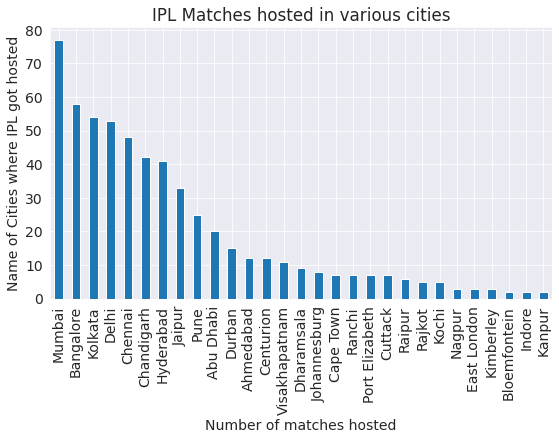

In [ ]:
city_match_count = combined_ipl_df.City_Name.value_counts()

city_match_count.plot(kind = 'bar')
plt.xlabel("Number of matches hosted")
plt.ylabel("Name of Cities where IPL got hosted")
plt.title("IPL Matches hosted in various cities");


The above graph clearly indicated that Mumbai got the maximum number of matches hosted while Kanpur and Indore got least number of matches to host

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

Let us now get the list of teams and the number of matches each team played in 9 seasons of data we have. To get this done we need to do the following - 
- Count the number of occurences of each team name in "Tean_Name" column which will return a series 
- Plot the graph using the series 

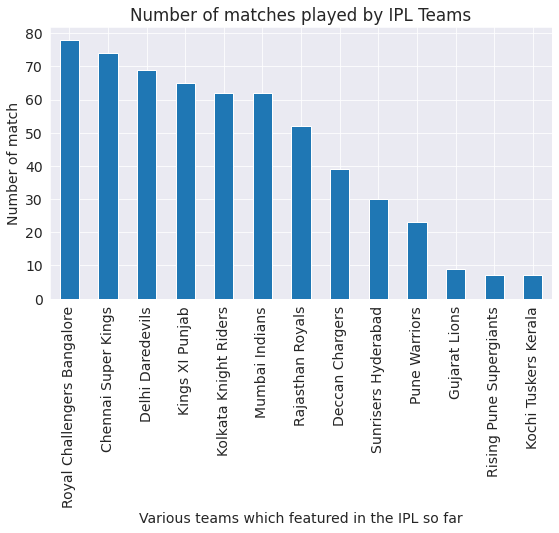

In [ ]:
team_match_count = combined_ipl_df['Team_Name'].value_counts()
team_match_count.plot(kind = 'bar')
plt.xlabel("Various teams which featured in the IPL so far")
plt.ylabel("Number of match")
plt.title("Number of matches played by IPL Teams");


The above graph clearly indicates that Royal Challenges Bangalore played most number of matches and Kochi Tuskers Kerela played the least number of matches in 9 seasons of IPL

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

Let us now see through graph on the number of matches won by batting first or batting second. To get this done we need to do the following - 
- Get the count of matches won by batting first, i.e. matches won by runs 
- Get the count of matches won by batting second,i.e. matches won by wickets 
- Plot the two values on pie chart

Text(0.5, 1.0, 'Matches Won - Batting First vs Batting Second')

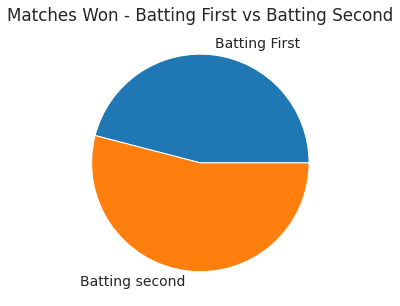

In [ ]:
# Count the number of matches won by batting second 
number_of_matches_won_batting_second = combined_ipl_df[combined_ipl_df.Win_Type == "by wickets"].count()['Win_Type']

# Count the number of matches won by batting first
number_of_matches_won_batting_first = combined_ipl_df[combined_ipl_df.Win_Type == "by runs"].count()['Win_Type']


plt.pie([number_of_matches_won_batting_first, number_of_matches_won_batting_second], labels = ["Batting First", "Batting second"])
plt.title("Matches Won - Batting First vs Batting Second")

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

Let us now get something more difficult and complex. Let us get a graph for number of matches won by each time. This is difficult because we dont have any column in dataframe with the name of the winner. What we have is the Match Winner ID which is to be mapped with the dataframe having details related to the teams. We will use apply() function to get our job done. 
Psuedo Steps to acheive the requirements are given below - 
- Create a column "Winner_Team" and place the value of Winner Team if the Team ID is equal to Match Winner ID 
- Now we will have team name for all the rows where value of Team ID is equal to Match winner ID
- In the case where opponent team won the match, we need to get opponent team ID and put the value of ipl_teams_dataframe on the index 

Please read the comments in the source code to understand each step


Text(0, 0.5, 'Number of matches')

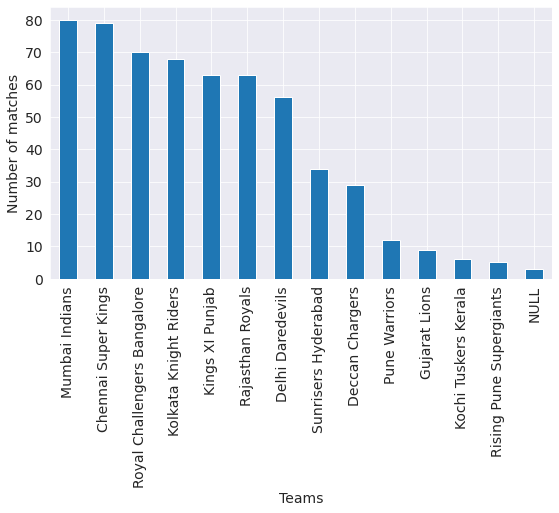

In [ ]:
# define a function "find_match_winner" which takes dataframe as an input 
def find_match_winner(combined_df):

  # Get the values of team_name_id, match_winner_id and opponent_team_id and convert them into float for comparison
  team_name_id = float(combined_df['Team_Name_Id'])
  match_winner_id = float(combined_df['Match_Winner_Id'])
  opponent_team_id = float(combined_df['Opponent_Team_Id'])

  # Check if team name id is euqal to match winner id 
  if (team_name_id == match_winner_id):
    # return the value of team name in the row which will get filled in the column Winner Team
    return combined_df['Team_Name']

  # Check if opponent team id is euqal to match winner id 
  elif (match_winner_id == opponent_team_id):
    # return the value of team name available at location opponent_team_id - 1 from dataframe raw_ipl_df
    return raw_ipl_team_df.loc[int(opponent_team_id) - 1]['Team_Name']
  else:
    # Place null for no result or a tie
    return "NULL"
    
# Call apply function on every row of the dataframe 
combined_ipl_df['Winner_Team'] = combined_ipl_df.apply(find_match_winner, axis = 1)

# Count the unique occurences of each Winning Team 
team_match_win_count = combined_ipl_df['Winner_Team'].value_counts()
team_match_win_count.plot(kind='bar')
plt.xlabel("Teams")
plt.ylabel("Number of matches")

Let us know explore the frequency of matches won by more than 10 runs and less than 10 runs. To get this done, we will follow the steps as given - 
- count the events of win by more than 75 runs by using conditions on column WinType and Wonby > 10
- count the events of win by less than 75 runs by using conditions on column WinType and Wonby < 10
- Plot the pie graph

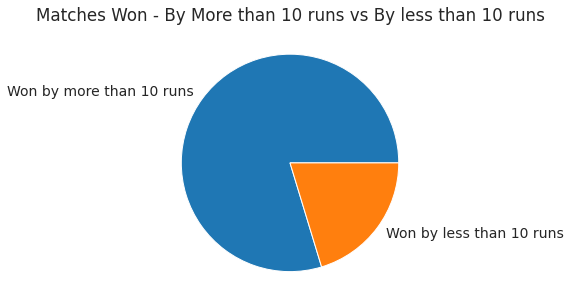

In [ ]:
# Get the number of matches won batting first and by more than or euqal to 10 runs 
number_of_matches_won_by_more_than_10_runs = combined_ipl_df[(combined_ipl_df.Win_Type == "by runs") & (combined_ipl_df.Won_By >= 10)].count()['Win_Type']

# Get the number of matches won batting first and by less than 10 runs 
number_of_matches_won_by_less_than_10_runs = combined_ipl_df[(combined_ipl_df.Win_Type == "by runs") & (combined_ipl_df.Won_By < 10)].count()['Win_Type']

# Plot the pie chart
plt.pie([number_of_matches_won_by_more_than_10_runs, number_of_matches_won_by_less_than_10_runs], labels = ["Won by more than 10 runs", "Won by less than 10 runs"])
plt.title("Matches Won - By More than 10 runs vs By less than 10 runs");

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

## Asking and Answering Questions

The below section will now answer critical and interesting questions based on the analysis done on the dataset. This is the most fruitful part of data analysis which is to answer the questions asked by business. We will put 5 interesting questions and will try to answer them based on our analysis on IPL Data



#### Q1: Which team won the match by most number of runs in 9 seasons of IPL ? Asnwer the following - 
- Team which won by most number of runs 
- By how many runs 
- Where was the match played 

In [ ]:
winner_team = combined_ipl_df.max()['Winner_Team']
by_runs = combined_ipl_df.max()['Won_By']
venue = combined_ipl_df.max()['City_Name']

In [ ]:
print("{} is the team to win a match by most number of runs".format(winner_team))

Sunrisers Hyderabad is the team to win a match by most number of runs


In [ ]:
print("They won the match by {} runs".format(int(by_runs)))

They won the match by 144 runs


In [ ]:
print("Match was played in {}". format(venue))


Match was played in Visakhapatnam
[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

#### Q2: How many matches were tied or with no result  in 9 IPL Seasons ?

In [ ]:
# Number of matches tied 
tied_count = combined_ipl_df[combined_ipl_df.Win_Type == "Tie"].count()['Win_Type']

# Number of matches with no result 
no_result = combined_ipl_df[combined_ipl_df.Win_Type == "No Result"].count()['Win_Type']


In [ ]:
print("Number of Tied Matches in  9 IPL seasons = ", tied_count )


Number of Tied Matches in  9 IPL seasons =  6
Number of matches with no result in 9 IPL seasons =  3


In [ ]:
print("Number of matches with no result in 9 IPL seasons = ", no_result)

Number of matches with no result in 9 IPL seasons =  3


#### Q3: What is the probability of a match getting tied or no result ?


In [ ]:
probability_of_tied_match = combined_ipl_df[combined_ipl_df.Win_Type == "Tie"].count()['Win_Type'] / combined_ipl_df.count()['Win_Type']
probability_of_no_result = combined_ipl_df[combined_ipl_df.Win_Type == "No Result"].count()['Win_Type'] / combined_ipl_df.count()['Win_Type']

In [ ]:
print("Probability of a match getting tied is - ", probability_of_tied_match)
print("Probability of a match having no result is - ", probability_of_no_result)

Probability of a match getting tied is -  0.010398613518197574
Probability of a match having no result is -  0.005199306759098787


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

#### Q4: What is the probability of a close match when a team wins batting first ?
Let us say that a close match is when a team wins by a margin of less than 10 runs. We will calculate the probabiliy of a team winning a match by less than 10 runs

In [ ]:
# Get the number of matches won batting first and by less than 75 runs 
number_of_matches_won_by_less_than_10_runs = combined_ipl_df[(combined_ipl_df.Win_Type == "by runs") & (combined_ipl_df.Won_By < 10)].count()['Win_Type']

probability = number_of_matches_won_by_less_than_10_runs / combined_ipl_df[combined_ipl_df.Win_Type == 'by runs'].count()['Win_Type']

In [ ]:
print("Probability of a close match (a team winning by a margin of less than 10 runs) is ", probability)

Probability of a close match (a team winning by a margin of less than 10 runs) is  0.20306513409961685


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

#### Q5: What is the probability of winning a match if batting first and second respectively ?

In [ ]:
wins_batting_first = combined_ipl_df[combined_ipl_df.Win_Type == "by runs"].count()['Win_Type']
probability_of_win_batting_first = wins_batting_first / combined_ipl_df.count()['Win_Type']

In [ ]:
wins_batting_second =  combined_ipl_df[combined_ipl_df.Win_Type == "by wickets"].count()['Win_Type']
probability_of_win_batting_second = wins_batting_second / combined_ipl_df.count()['Win_Type']

In [ ]:
print("Probability of winning a match by batting first - ", probability_of_win_batting_first)
print("Probability of winning a match by batting second - ", probability_of_win_batting_second)

Probability of winning a match by batting first -  0.45233968804159447
Probability of winning a match by batting second -  0.5320623916811091


Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

## Inferences and Conclusion

Following conclusions can be made based on the IPL dataset studied - 
- Team batting second has more chances of winning a match. Team batting second won 53 out of 100 matches played 
- Chances of a match getting tied is just 1% . This means only 1 match gets tied out of 100 matches
- Chances of a match getting no result is just 0.5%. This means only 1 out of 200 matches played will have no result 
- There is 20% chance of a close match where a team batting first just win by a margin of less than 10 runs

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/ipl-dataset-analysis


'https://jovian.ai/aaryaashay1848/ipl-dataset-analysis'

## References and Future Work

The dataset download from Kaggle has many more files and columns which can be used to analyze the performance of a player, team and answer many more complex questions like the one given below - 
- probability of a team winning by batting first in Mumbai
- probability of a team winning between two opponents who clashed in the past
- performance of various players in the team against various opponents


## References 
- [Pandas API documentation](https://pandas.pydata.org/docs/)
- [Pandas Geeks for Geeks tutorial](https://www.geeksforgeeks.org/pandas-tutorial/)
- [Pandas Tutorial: DataFrames in Python](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
- [Course: Pandas and NumPy Fundamentals](https://www.dataquest.io/course/pandas-fundamentals/)


> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()